## Linear Regrression example with sklearn

This is an example of how to do linear regrression with sklearn. this example was cobbled together using a number of sources/courses.

ere we will be exploring the Automobile datase from the UCI Machine Learning repository. A copy of the data is provided in the data folder. The data as well as descriptions was obtained from: https://archive.ics.uci.edu/ml/datasets/automobile

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = 99
pd.options.display.max_rows = 300

In [2]:
#load the data
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
autos = pd.read_csv('imports-85.data',names=cols)
autos.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
#missing data have a ? reload  
autos = pd.read_csv('imports-85.data',names=cols, na_values='?')
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Most cols are self explanitory. However there are two that, unless you are in the car insurance buisness won't know: 
- Symboling: 
      corresponds to the degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.
- Normalized loss:
      is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

In [4]:
# get some info

autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

205 rows by 26 columns.Let's look for missing data

In [5]:
autos.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

normalized-losses is the big one here (with 41 missing values), while stroke, bore and price are missing 4, while  num-of-doors, horsepower and peak-rpm are missing 2 apiece. Before replacing all missing data with the mean, lets have a look at some stats

In [6]:
autos.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized-losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,201.0,3.329751,0.273539,2.54,3.15,3.31,3.59,3.94
stroke,201.0,3.255423,0.316717,2.07,3.11,3.29,3.41,4.17


The object of this exercise is to predict the car price fromm these set of features. There are a few NaNs, and with mainly numeric columns. Instead of discarding these, we shall replace the NaNs with the mean values of each column. There are 4 without the actual price. We can either replace the price with the mean value or remove these 4 cars. 

In [7]:
autos[autos['price'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


the four auts with missing price are very varied. Is it better to just remove these? For now I'll store them for later use

In [11]:
autos_miss_price = autos[autos['price'].isnull()]
autos = autos.dropna(subset=['price'])

Now here's a tricky part. Do we try to Train/test split or use k-fold cross validation. And do we impute our data before? The answer to this si t use cross validation and I will use the Pipeline method to apply the imputation. This is taken from [preprocessing_pipelines notebook]('preprocessing_pipelines.ipynb'). But before we go to this there are a couple of other data preprocessing steps: 1. looking for correlation and 2: converting categorical colums to numerical. 

In [63]:
# a list of the numerical columns
numerical_cols = ['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size',
                  'bore','stroke','compression-rate','horsepower','peak-rpm','city-mpg','highway-mpg','price']

numerical_autos = autos[numerical_cols]
numerical_autos.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


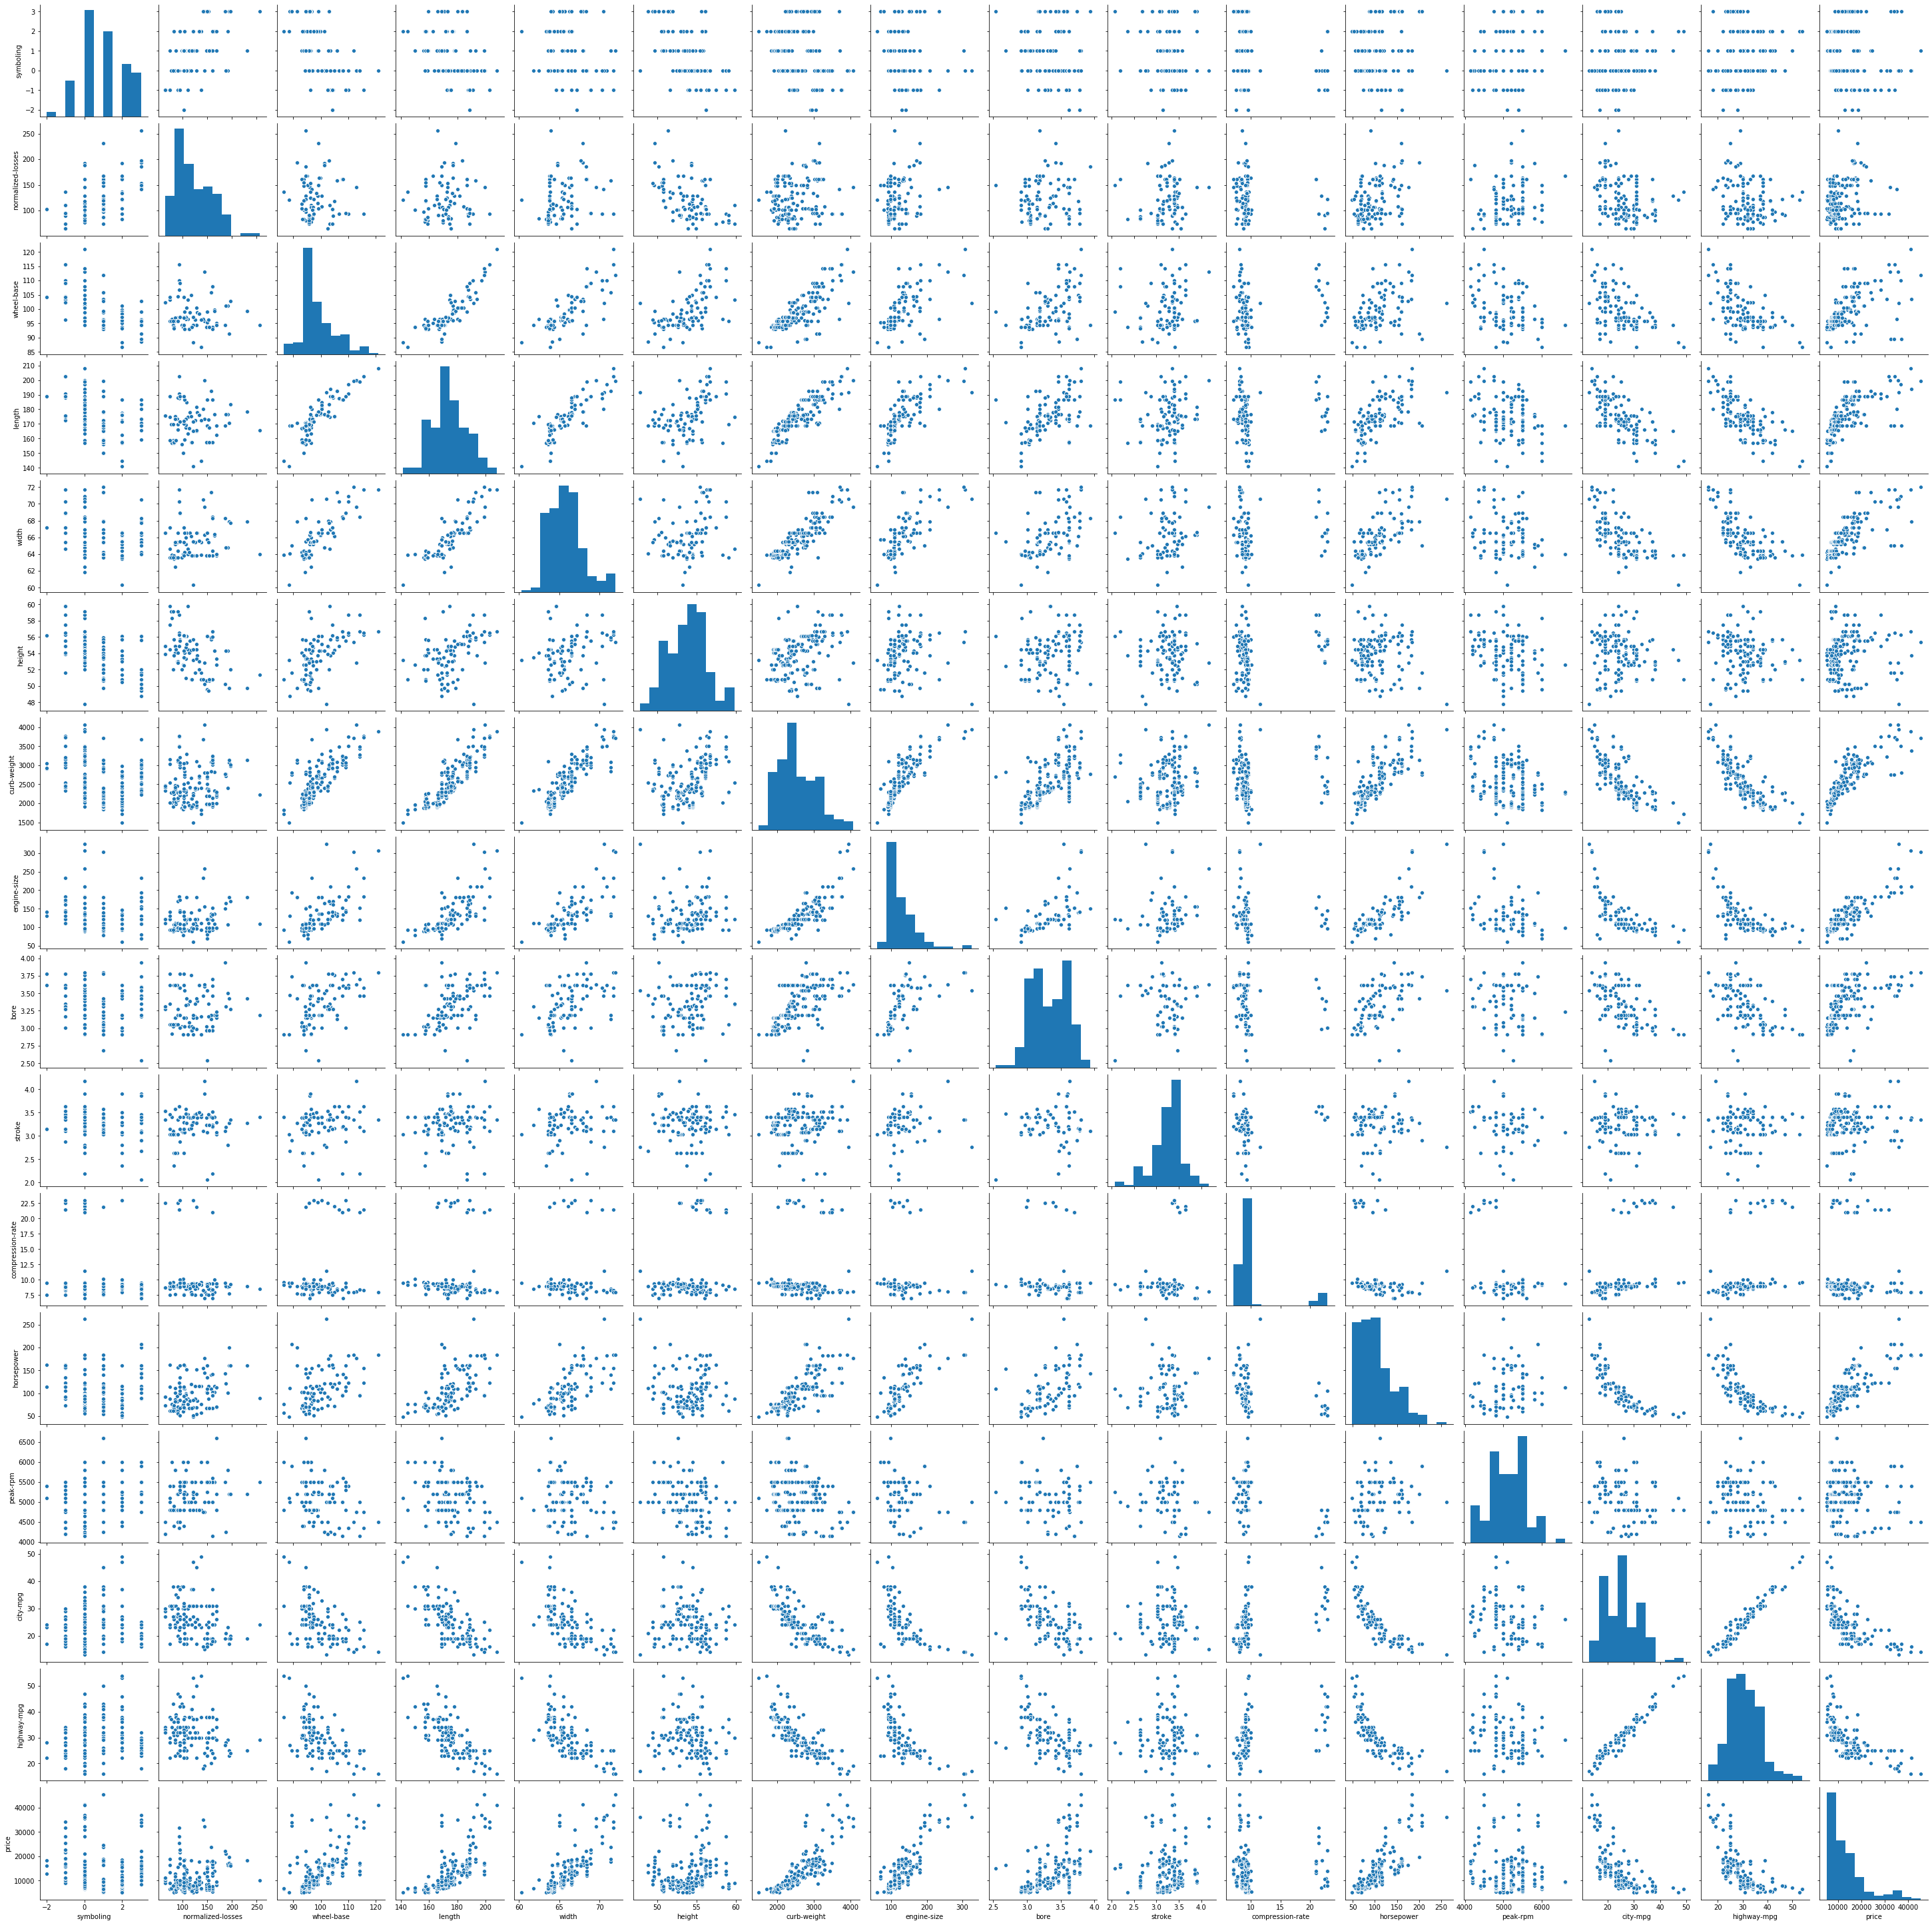

In [13]:
# there are far to many columns to view the pairplots, 
# but for reference we will still plot it

sns.pairplot(numerical_autos)

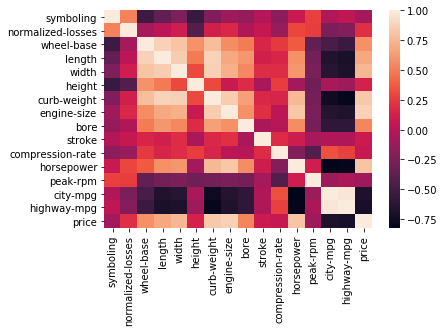

In [14]:
sns.heatmap(numerical_autos.corr())

In [66]:
numerical_autos.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,highway-mpg,price
symboling,1.000000,0.528667,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.144324,-0.008245,-0.182196,0.076038,0.280635,0.036233,-0.082391
normalized-losses,0.528667,1.000000,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.167365,-0.036167,0.065627,-0.132654,0.295772,0.264597,-0.210768,0.203254
wheel-base,-0.535987,-0.074362,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.494884,0.158502,0.250313,0.371621,-0.360593,-0.543304,0.584642
length,-0.365404,0.023220,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.610051,0.124139,0.159733,0.580309,-0.286321,-0.698142,0.690628
width,-0.242423,0.105073,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544924,0.188829,0.189867,0.615315,-0.245975,-0.680635,0.751265
height,-0.550160,-0.432335,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.185907,-0.062704,0.259737,-0.087407,-0.311574,-0.104812,0.135486
curb-weight,-0.233118,0.119893,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644617,0.167562,0.156433,0.758063,-0.279375,-0.794889,0.834415
engine-size,-0.110581,0.167365,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.582857,0.209523,0.028889,0.822713,-0.256773,-0.679571,0.872335
bore,-0.144324,-0.036167,0.494884,0.610051,0.544924,0.185907,0.644617,0.582857,1.000000,-0.055390,0.001250,0.568527,-0.277662,-0.599218,0.543436
stroke,-0.008245,0.065627,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.100040,-0.068300,-0.035201,0.082310


There are some very highly corelated features with price. These should be removed/pruned

In [24]:
# from https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
# Create correlation matrix

corr_matrix = numerical_autos.drop('price',axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] # I think any features above 0.8 is highly correlated
to_drop

['length',
 'width',
 'curb-weight',
 'engine-size',
 'horsepower',
 'city-mpg',
 'highway-mpg']

In [65]:
# some of these seem to be correlated with price
numerical_autos.corr()['price']

symboling           -0.082391
normalized-losses    0.203254
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543436
stroke               0.082310
compression-rate     0.071107
horsepower           0.810533
peak-rpm            -0.101649
highway-mpg         -0.704692
price                1.000000
Name: price, dtype: float64

It may be a bit fool hardy to remove all these features. However we see that the highway-mpg and city-mpg  are the most correlated features. We will drop the city-mpg feature as it has a lower correlation with price.thre erae also a number of features that have no correlation with price. Would keeping them help?

In [64]:
numerical_autos = numerical_autos.drop('city-mpg', axis=1)

In [67]:
# categorical features
categorical_cols = ['make','fuel-type','aspiration', 'body-style', 'drive-wheels','engine-location','engine-type','num-of-cylinders','num-of-doors']
categorical_autos = autos[categorical_cols]
categorical_autos.head()


,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,num-of-doors
0,alfa-romero,gas,std,convertible,rwd,front,dohc,four,two
1,alfa-romero,gas,std,convertible,rwd,front,dohc,four,two
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,six,two
3,audi,gas,std,sedan,fwd,front,ohc,four,four
4,audi,gas,std,sedan,4wd,front,ohc,five,four


In [68]:
categorical_autos.isnull().sum()

make                0
fuel-type           0
aspiration          0
body-style          0
drive-wheels        0
engine-location     0
engine-type         0
num-of-cylinders    0
num-of-doors        2
dtype: int64

In [69]:
categorical_autos.nunique()

make                22
fuel-type            2
aspiration           2
body-style           5
drive-wheels         3
engine-location      2
engine-type          6
num-of-cylinders     7
num-of-doors         2
dtype: int64

In [70]:
# remember num-of-doors had missing values. impute using the most common value. Note: unsure if to drop this column
categorical_autos['num-of-doors'].value_counts(normalize=True)

four    0.567839
two     0.432161
Name: num-of-doors, dtype: float64

In [38]:
# replace the na vals with 'four'
categorical_autos['num-of-doors'].fillna('four',inplace=True)

/home/hayden/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [71]:
categorical_autos.isnull().sum()

make                0
fuel-type           0
aspiration          0
body-style          0
drive-wheels        0
engine-location     0
engine-type         0
num-of-cylinders    0
num-of-doors        2
dtype: int64

In [72]:
#before moving forward the categorical vals need to be converted to dummy vars
categorical_autos = pd.get_dummies(categorical_autos,columns=categorical_cols,drop_first=True, prefix_sep='__')
categorical_autos.head()

,make__audi,make__bmw,make__chevrolet,make__dodge,make__honda,make__isuzu,make__jaguar,make__mazda,make__mercedes-benz,make__mercury,make__mitsubishi,make__nissan,make__peugot,make__plymouth,make__porsche,make__renault,make__saab,make__subaru,make__toyota,make__volkswagen,make__volvo,fuel-type__gas,aspiration__turbo,body-style__hardtop,body-style__hatchback,body-style__sedan,body-style__wagon,drive-wheels__fwd,drive-wheels__rwd,engine-location__rear,engine-type__l,engine-type__ohc,engine-type__ohcf,engine-type__ohcv,engine-type__rotor,num-of-cylinders__five,num-of-cylinders__four,num-of-cylinders__six,num-of-cylinders__three,num-of-cylinders__twelve,num-of-cylinders__two,num-of-doors__two
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [75]:
X = pd.concat([numerical_autos.drop(['price'],axis=1),categorical_autos],axis=1)
    
np.shape(X)

(201, 56)

In [76]:
X.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,highway-mpg,make__audi,make__bmw,make__chevrolet,make__dodge,make__honda,make__isuzu,make__jaguar,make__mazda,make__mercedes-benz,make__mercury,make__mitsubishi,make__nissan,make__peugot,make__plymouth,make__porsche,make__renault,make__saab,make__subaru,make__toyota,make__volkswagen,make__volvo,fuel-type__gas,aspiration__turbo,body-style__hardtop,body-style__hatchback,body-style__sedan,body-style__wagon,drive-wheels__fwd,drive-wheels__rwd,engine-location__rear,engine-type__l,engine-type__ohc,engine-type__ohcf,engine-type__ohcv,engine-type__rotor,num-of-cylinders__five,num-of-cylinders__four,num-of-cylinders__six,num-of-cylinders__three,num-of-cylinders__twelve,num-of-cylinders__two,num-of-doors__two
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [77]:
y = numerical_autos['price']
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

### Train test split

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [89]:
# impute the missing data

X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

In [90]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
# Model evaluate
# print the intercept
print(lm.intercept_)

13912.328674761526


In [92]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
symboling,-7.307898e+02
normalized-losses,-7.626888e+00
wheel-base,2.960720e+02
length,-1.298286e+02
width,4.235935e+02
height,-4.847777e+02
curb-weight,4.850524e+00
engine-size,6.719661e+01
bore,-1.730515e+03
stroke,-2.246999e+03


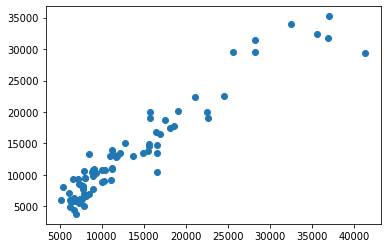

In [93]:
# Model predictions
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

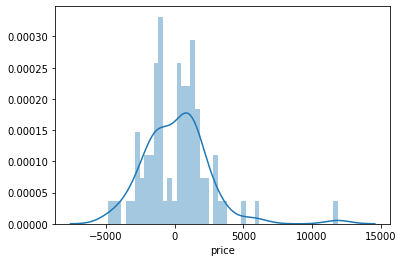

In [94]:
sns.distplot((y_test-predictions),bins=50);

In [95]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1787.3232162376776
MSE: 5839842.671707054
RMSE: 2416.5766430442577


The RMSE is $2416. How can we improve this result? See https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [98]:
import statsmodels.api as sm
X_1 = sm.add_constant(X_train)

#Fitting sm.OLS model
model = sm.OLS(y_train,X_1).fit()
model.pvalues

/home/hayden/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/hayden/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/hayden/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/hayden/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


const                       0.562497
symboling                   0.048717
normalized-losses           0.420814
wheel-base                  0.008996
length                      0.057944
width                       0.166304
height                      0.017823
curb-weight                 0.031483
engine-size                 0.020041
bore                        0.434481
stroke                      0.141202
compression-rate            0.150713
horsepower                  0.723552
peak-rpm                    0.415411
highway-mpg                 0.287376
make__audi                  0.022250
make__bmw                   0.016045
make__chevrolet             0.767488
make__dodge                 0.725389
make__honda                 0.265946
make__isuzu                 0.151314
make__jaguar                0.386159
make__mazda                 0.191671
make__mercedes-benz         0.017334
make__mercury               0.816819
make__mitsubishi            0.802442
make__nissan                0.251851
m

In [99]:
import statsmodels.api as sm
#Backward Elimination
cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['symboling', 'wheel-base', 'length', 'height', 'curb-weight', 'engine-size', 'stroke', 'peak-rpm', 'make__audi', 'make__bmw', 'make__honda', 'make__mazda', 'make__mercedes-benz', 'make__nissan', 'make__porsche', 'make__saab', 'make__volkswagen', 'aspiration__turbo', 'body-style__hatchback', 'body-style__sedan', 'body-style__wagon', 'drive-wheels__fwd', 'engine-type__ohcv', 'num-of-cylinders__five', 'num-of-cylinders__four', 'num-of-cylinders__two']


In [103]:
# retrain the model
lm2 = LinearRegression()
lm2.fit(X_train[selected_features],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

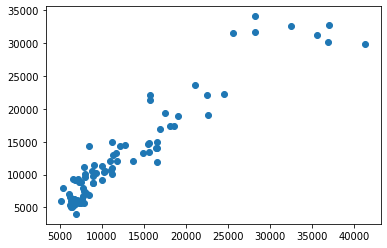

In [105]:
# Model predictions
predictions2 = lm2.predict(X_test[selected_features])
plt.scatter(y_test,predictions2)

In [106]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

RMSE: 2742.435289081534


The feture elimination did not improve the results. strange.